# 03-Classification Homework

## Environment and Data Preparation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [2]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## Missing Values

In [3]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.annual_income = df.annual_income.fillna(0)
df = df.fillna('NA')
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Q1. What is the most frequent observation (mode) for the column industry?

In [5]:
df.industry.mode()

0    retail
Name: industry, dtype: object

## List for Numerical and Categorical Variables

In [6]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [7]:
numerical =['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [8]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']

## Feature Importance: Correlation

In [9]:
df[numerical].corrwith(df.converted)

number_of_courses_viewed    0.435914
annual_income               0.053131
interaction_count           0.374573
lead_score                  0.193673
dtype: float64

## Q2. What are the two features that have the biggest correlation?

In [10]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


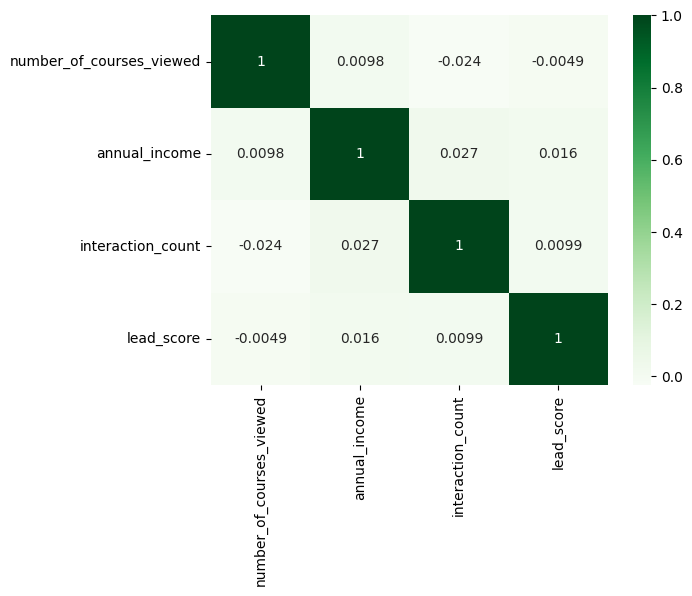

In [11]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='Greens')
plt.show()

## Splitting the Data Set

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [14]:
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [15]:
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values

In [16]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Q3. Which of these variables has the biggest mutual information score?

In [17]:
def mutual_info_converted_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [18]:
mi_scores = df_full_train[categorical].apply(mutual_info_converted_score)
mi_scores.sort_values(ascending=False).round(2)

lead_source          0.03
employment_status    0.01
industry             0.01
location             0.00
dtype: float64